In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


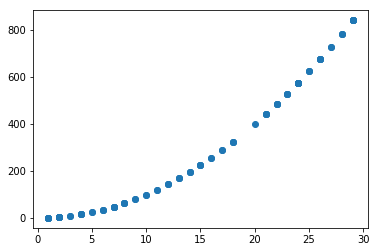

In [2]:
train_x = np.expand_dims(np.random.randint(1, 30, 100),1)
train_y = train_x*train_x

# plot input data
plt.scatter(train_x, train_y)
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


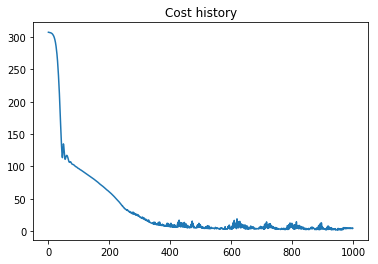

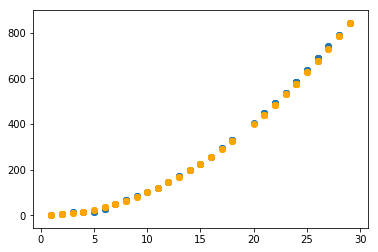

In [3]:
def build_layer(x, units):
    input_features = int(x.shape[1])
    w = tf.Variable(tf.truncated_normal([input_features, units], stddev=0.1))
    b = tf.Variable(tf.constant(1.0, shape=[1, units]))
    output = tf.nn.relu(tf.add(tf.matmul(x, w), b))
    return output

def build_model(train_x, train_y, layers):
    input_features = train_x.shape[1]
    output_features = 1
    
    X = tf.placeholder(tf.float32,[None,input_features], name="input")
    Y = tf.placeholder(tf.float32,[None,1], name="output")
    
    x = X
    for layer_units in layers:
        x = build_layer(x, layer_units)
    Y_pred = build_layer(x, 1)
    
    return X, Y, Y_pred

# build our model
X, Y, Y_pred = build_model(train_x, train_y, [16,8,4])

# optimizer
learning_rate = 1e-2
cost = tf.losses.absolute_difference(Y, Y_pred)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# run training
sess = tf.Session()
sess.run(tf.initialize_all_variables())
training_epochs = 1000
cost_history = np.array([])
for epoch in range(training_epochs):
    _, _cost = sess.run([optimizer,cost],feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,_cost)
        
# plot cost history
plt.plot(cost_history)
plt.title('Cost history')
plt.show()

# check predictions
predictions = sess.run(Y_pred, feed_dict={X: train_x})
plt.scatter(train_x, predictions)
plt.scatter(train_x, train_y, color='orange')
plt.show()